# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy




### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?q={city}&appid=" + weather_api_key + "&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url.format(city=city)

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Get weather data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print(f"City {city} not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | cambria
Processing Record 3 of Set 1 | roma
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | dunedin
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | ancud
Processing Record 8 of Set 1 | miyako
Processing Record 9 of Set 1 | utrik
Processing Record 10 of Set 1 | morehead city
Processing Record 11 of Set 1 | majene
Processing Record 12 of Set 1 | tazovsky
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | ahau
City ahau not found. Skipping...
Processing Record 18 of Set 1 | beaufort
Processing Record 19 of Set 1 | mel'nikovo
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | mount isa
Processing Record 22 of Set 1 | singarayakonda
Pr

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())


City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64


In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,21.78,88,0,7.77,PN,1728096718
1,cambria,35.5641,-121.0808,15.59,95,58,0.45,US,1728096720
2,roma,43.2128,-75.4557,16.08,91,100,2.06,US,1728096686
3,yellowknife,62.4560,-114.3525,-0.71,93,20,1.54,CA,1728096723
4,dunedin,-45.8742,170.5036,13.22,99,99,0.89,NZ,1728096583


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.78,88,0,7.77,PN,1728096718
1,cambria,35.5641,-121.0808,15.59,95,58,0.45,US,1728096720
2,roma,43.2128,-75.4557,16.08,91,100,2.06,US,1728096686
3,yellowknife,62.4560,-114.3525,-0.71,93,20,1.54,CA,1728096723
4,dunedin,-45.8742,170.5036,13.22,99,99,0.89,NZ,1728096583


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

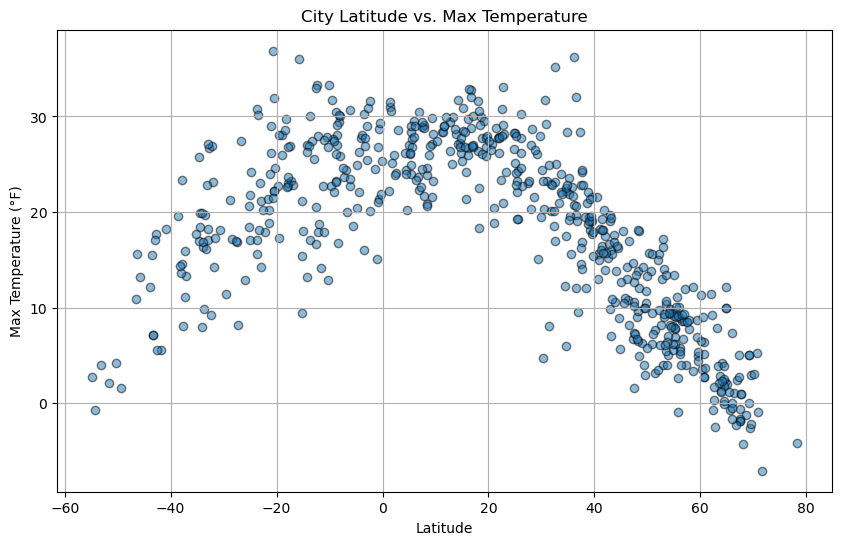

In [16]:
# Build scatter plot for latitude vs. max temperature
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolor='black', alpha=0.5)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

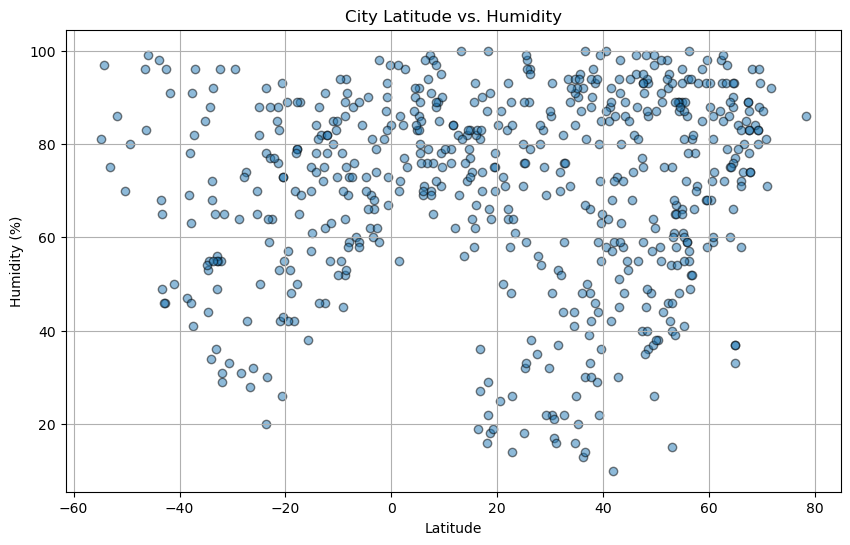

In [17]:
# Build scatter plot for latitude vs. humidity
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolor='black', alpha=0.5)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

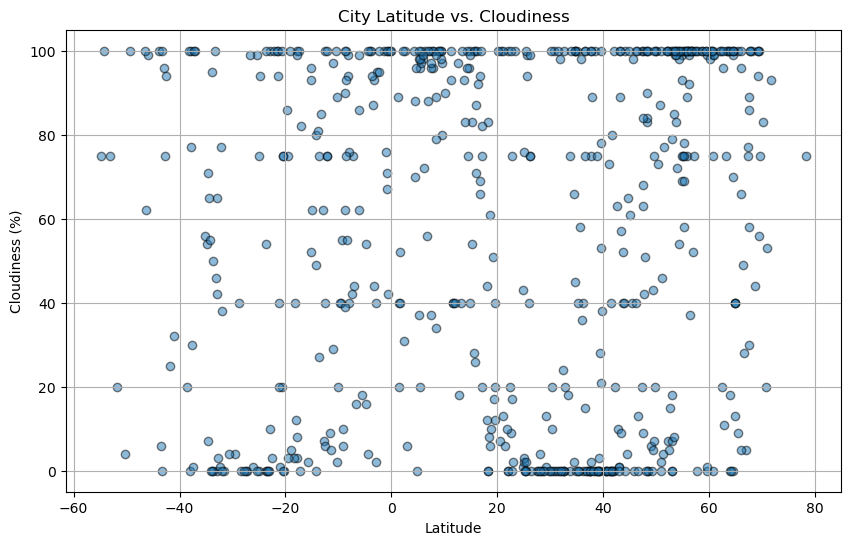

In [18]:
# Build scatter plot for latitude vs. cloudiness
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolor='black', alpha=0.5)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

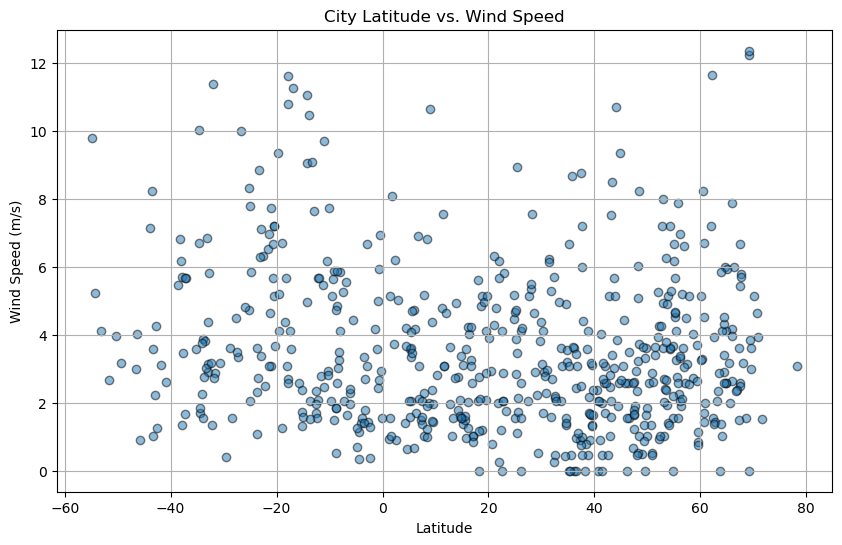

In [19]:
# Build scatter plot for latitude vs. wind speed
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolor='black', alpha=0.5)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


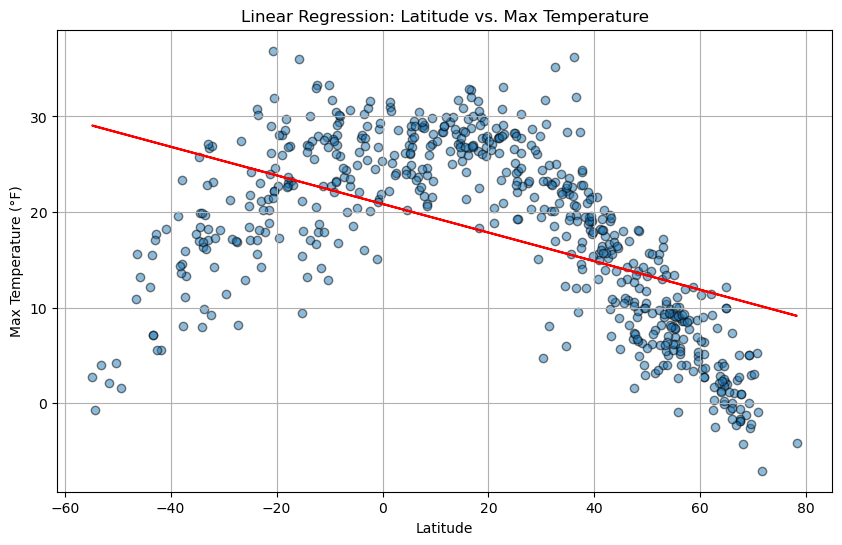

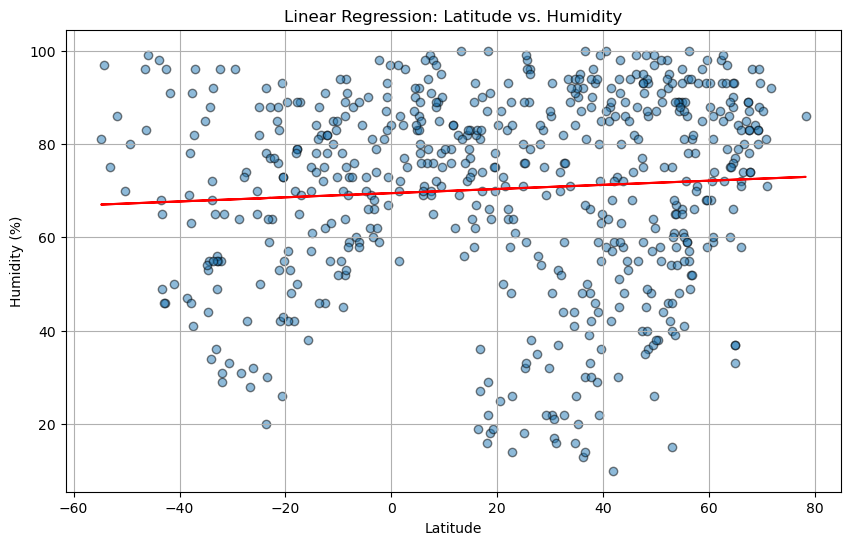

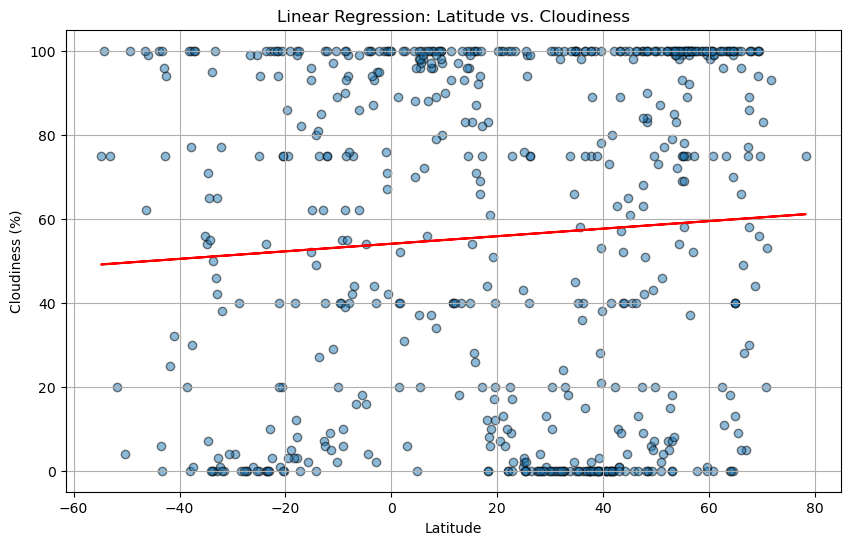

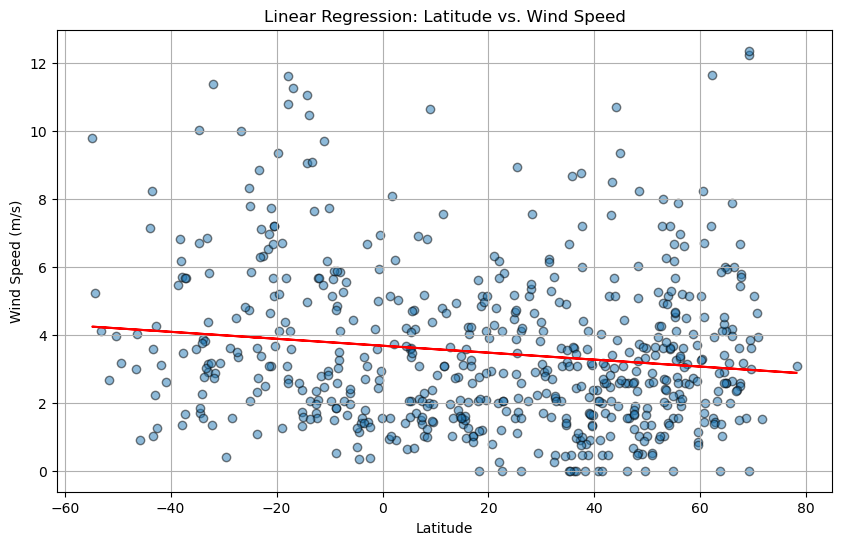

In [20]:
# Import necessary library
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def create_regression_plot(x, y, xlabel, ylabel, title, filename):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Calculate the regression line
    reg_line = slope * x + intercept

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, marker='o', edgecolor='black', alpha=0.5)

    # Plot the regression line
    plt.plot(x, reg_line, color='red')

    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)

    # Save the figure
    plt.savefig(filename)

    # Show plot
    plt.show()

# Example of calling the function for Latitude vs. Temperature
create_regression_plot(
    city_data_df['Lat'], 
    city_data_df['Max Temp'], 
    'Latitude', 
    'Max Temperature (°F)', 
    'Linear Regression: Latitude vs. Max Temperature', 
    'output_data/Linear_Reg_Temperature.png'
)

# Example of calling the function for Latitude vs. Humidity
create_regression_plot(
    city_data_df['Lat'], 
    city_data_df['Humidity'], 
    'Latitude', 
    'Humidity (%)', 
    'Linear Regression: Latitude vs. Humidity', 
    'output_data/Linear_Reg_Humidity.png'
)

# Example of calling the function for Latitude vs. Cloudiness
create_regression_plot(
    city_data_df['Lat'], 
    city_data_df['Cloudiness'], 
    'Latitude', 
    'Cloudiness (%)', 
    'Linear Regression: Latitude vs. Cloudiness', 
    'output_data/Linear_Reg_Cloudiness.png'
)

# Example of calling the function for Latitude vs. Wind Speed
create_regression_plot(
    city_data_df['Lat'], 
    city_data_df['Wind Speed'], 
    'Latitude', 
    'Wind Speed (m/s)', 
    'Linear Regression: Latitude vs. Wind Speed', 
    'output_data/Linear_Reg_WindSpeed.png'
)


In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,cambria,35.5641,-121.0808,15.59,95,58,0.45,US,1728096720
2,roma,43.2128,-75.4557,16.08,91,100,2.06,US,1728096686
3,yellowknife,62.4560,-114.3525,-0.71,93,20,1.54,CA,1728096723
5,iqaluit,63.7506,-68.5145,2.85,86,100,0.00,CA,1728096725
7,miyako,39.6367,141.9525,21.61,63,53,3.10,JP,1728096728


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.78,88,0,7.77,PN,1728096718
4,dunedin,-45.8742,170.5036,13.22,99,99,0.89,NZ,1728096583
6,ancud,-41.8697,-73.8203,5.60,91,25,3.10,CL,1728096727
10,majene,-3.5403,118.9707,30.27,60,87,3.34,ID,1728096733
12,port-aux-francais,-49.3500,70.2167,1.63,80,100,3.16,TF,1728096735


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7855360046


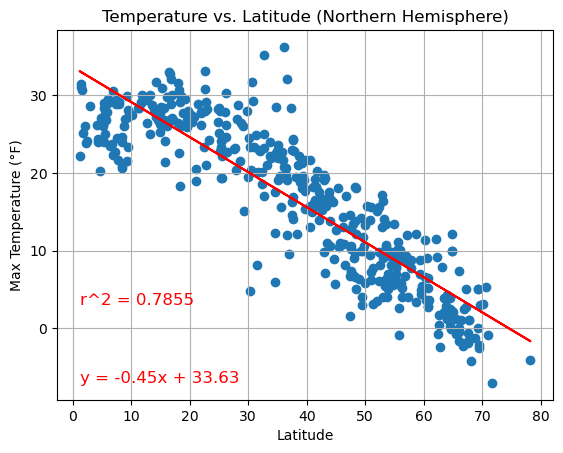

In [27]:
# Define a function to create Linear Regression plots with r-squared and annotation
def create_linear_regression_plot(x, y, title, xlabel, ylabel):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Calculate the regression line
    regression_line = slope * x + intercept
    
    # Create the scatter plot
    plt.scatter(x, y)
    
    # Add the regression line to the plot
    plt.plot(x, regression_line, color='red')
    
    # Incorporate other graph properties
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    # Annotate the equation of the regression line and r-squared value
    plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(min(x), min(y)), fontsize=12, color="red")
    plt.annotate(f'r^2 = {r_value**2:.4f}', xy=(min(x), min(y) + 10), fontsize=12, color="red")
    
    # Print the r-squared value
    print(f'The r^2-value is: {r_value**2:.10f}')

# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Define x and y values for the regression
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function to create the plot
create_linear_regression_plot(
    x_values, 
    y_values, 
    title='Temperature vs. Latitude (Northern Hemisphere)', 
    xlabel='Latitude', 
    ylabel='Max Temperature (°F)'
)

# Show the plot
plt.show()


The r^2-value is: 0.4383850694


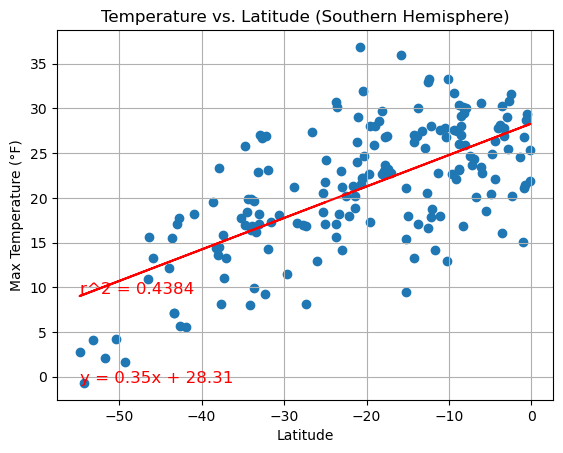

In [28]:

# Define a function to create Linear Regression plots with r-squared and annotation
def create_linear_regression_plot(x, y, title, xlabel, ylabel):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Calculate the regression line
    regression_line = slope * x + intercept
    
    # Create the scatter plot
    plt.scatter(x, y)
    
    # Add the regression line to the plot
    plt.plot(x, regression_line, color='red')
    
    # Incorporate other graph properties
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    # Annotate the equation of the regression line and r-squared value
    plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(min(x), min(y)), fontsize=12, color="red")
    plt.annotate(f'r^2 = {r_value**2:.4f}', xy=(min(x), min(y) + 10), fontsize=12, color="red")
    
    # Print the r-squared value
    print(f'The r^2-value is: {r_value**2:.10f}')

# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Define x and y values for the regression
x_values_southern = southern_hemi_df['Lat']
y_values_southern = southern_hemi_df['Max Temp']

# Call the function to create the plot for the Southern Hemisphere
create_linear_regression_plot(
    x_values_southern, 
    y_values_southern, 
    title='Temperature vs. Latitude (Southern Hemisphere)', 
    xlabel='Latitude', 
    ylabel='Max Temperature (°F)'
)

# Show the plot
plt.show()



**Discussion about the linear relationship:** YOUR RESPONSE HERE 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0009688551


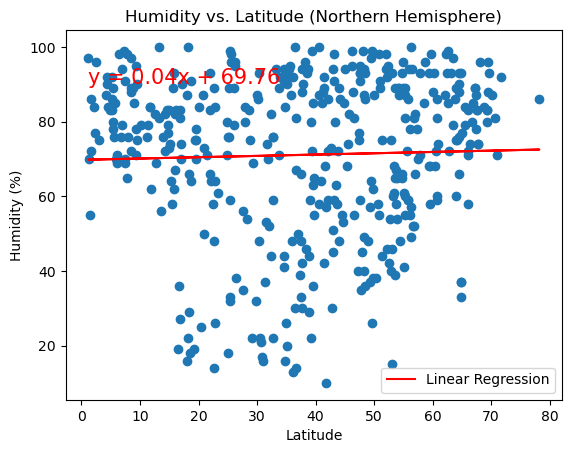

In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Extract Latitude and Humidity data
latitudes = northern_hemi_df["Lat"]
humidities = northern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(latitudes, humidities)

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2:.10f}")

# Create regression values for plotting
regress_values = latitudes * slope + intercept

# Plot the data and the regression line
plt.scatter(latitudes, humidities)
plt.plot(latitudes, regress_values, "r-", label='Linear Regression')

# Add title and labels
plt.title("Humidity vs. Latitude (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Annotate the regression equation on the plot
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', (latitudes.min(), humidities.max() * 0.9), fontsize=15, color="red")

# Display the plot
plt.legend()
plt.show()




The r^2-value is: 0.0126399554


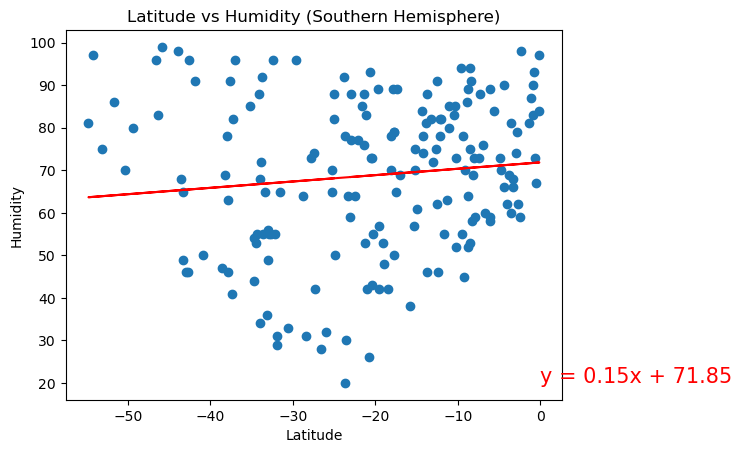

In [30]:
# Define the Southern Hemisphere data (latitudes < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Extract Latitude and Humidity data
latitudes = southern_hemi_df["Lat"]
humidities = southern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(latitudes, humidities)

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2:.10f}")

# Create regression values for plotting
regress_values = latitudes * slope + intercept

# Plot the data and the regression line
plt.scatter(latitudes, humidities)
plt.plot(latitudes, regress_values, "r-")

# Add title and labels
plt.title("Latitude vs Humidity (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Annotate the regression equation on the plot
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', (0, 20), fontsize=15, color="red")

# Display the plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0027703209


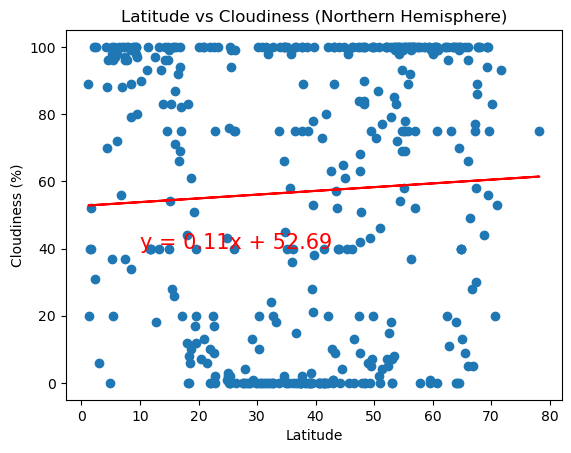

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Extract Latitude and Cloudiness data
latitudes = northern_hemi_df["Lat"]
cloudiness = northern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(latitudes, cloudiness)

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2:.10f}")

# Create regression values for plotting
regress_values = latitudes * slope + intercept

# Plot the data and the regression line
plt.scatter(latitudes, cloudiness)
plt.plot(latitudes, regress_values, "r-")

# Add title and labels
plt.title("Latitude vs Cloudiness (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Annotate the regression equation on the plot
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', (10, 40), fontsize=15, color="red")

# Display the plot
plt.show()


The r^2-value is: 0.0173689287


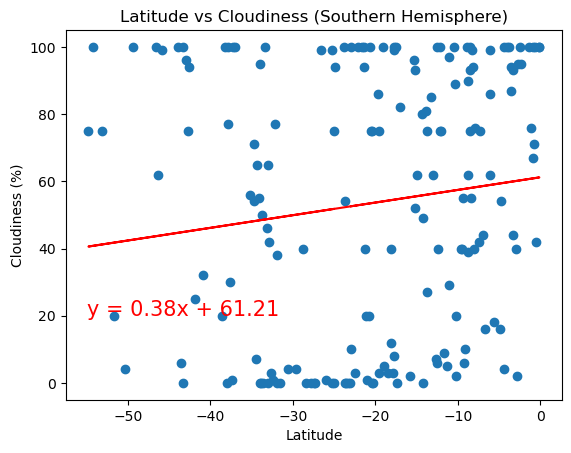

In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Extract Latitude and Cloudiness data
latitudes = southern_hemi_df["Lat"]
cloudiness = southern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(latitudes, cloudiness)

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2:.10f}")

# Create regression values for plotting
regress_values = latitudes * slope + intercept

# Plot the data and the regression line
plt.scatter(latitudes, cloudiness)
plt.plot(latitudes, regress_values, "r-", label='Linear Regression')

# Add title and labels
plt.title("Latitude vs Cloudiness (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Annotate the regression equation on the plot
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', (-55, 20), fontsize=15, color="red")

# Display the plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0115557223


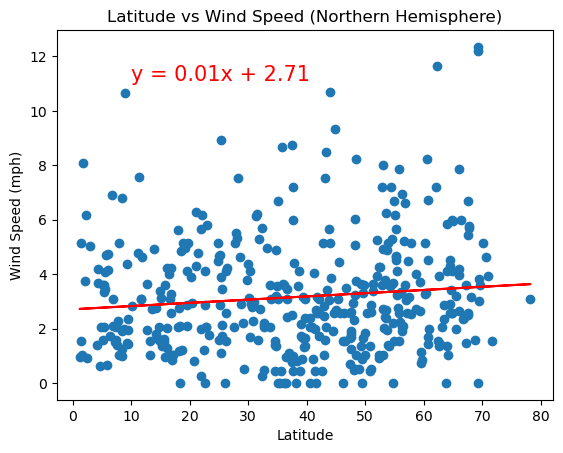

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Extract Latitude and Wind Speed data
latitudes = northern_hemi_df["Lat"]
wind_speed = northern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(latitudes, wind_speed)

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2:.10f}")

# Create regression values for plotting
regress_values = latitudes * slope + intercept

# Plot the data and the regression line
plt.scatter(latitudes, wind_speed)
plt.plot(latitudes, regress_values, "r-", label='Linear Regression')

# Add title and labels
plt.title("Latitude vs Wind Speed (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Annotate the regression equation on the plot
# Adjust the coordinates for better visibility based on your data
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', (10, max(wind_speed) * 0.9), fontsize=15, color="red")

# Display the plot
plt.show()




The r^2-value is: 0.0118311828


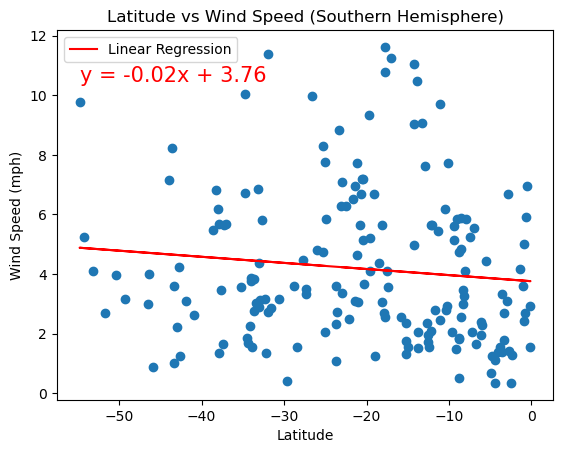

In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Extract Latitude and Wind Speed data
latitudes = southern_hemi_df["Lat"]
wind_speed = southern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(latitudes, wind_speed)

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2:.10f}")

# Create regression values for plotting
regress_values = latitudes * slope + intercept

# Plot the data and the regression line
plt.scatter(latitudes, wind_speed)
plt.plot(latitudes, regress_values, "r-", label='Linear Regression')

# Add title and labels
plt.title("Latitude vs Wind Speed (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Annotate the regression equation on the plot
# Adjust the coordinates for better visibility based on your data
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', (latitudes.min(), wind_speed.max() * 0.9), fontsize=15, color="red")

# Display the plot
plt.legend()
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE